In [1]:
import numpy as np
import csv
import pandas as pd
import scipy.misc as sp
import json

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# read the log with image names and steering angles

In [4]:
reader = csv.reader(open('driving_log.csv'), delimiter=',')
cimage_names = []
limage_names = []
rimage_names = []
steering = []
first_line = True
for row in reader:
    #print(row)
    if first_line:
        first_line = False
        continue
    cimage_names.append(row[0].strip())
    limage_names.append(row[1].strip())
    rimage_names.append(row[2].strip())
    steering.append(float(row[3]))
steering = np.array(steering)
len(cimage_names)

8035

In [5]:
# look at steering angles

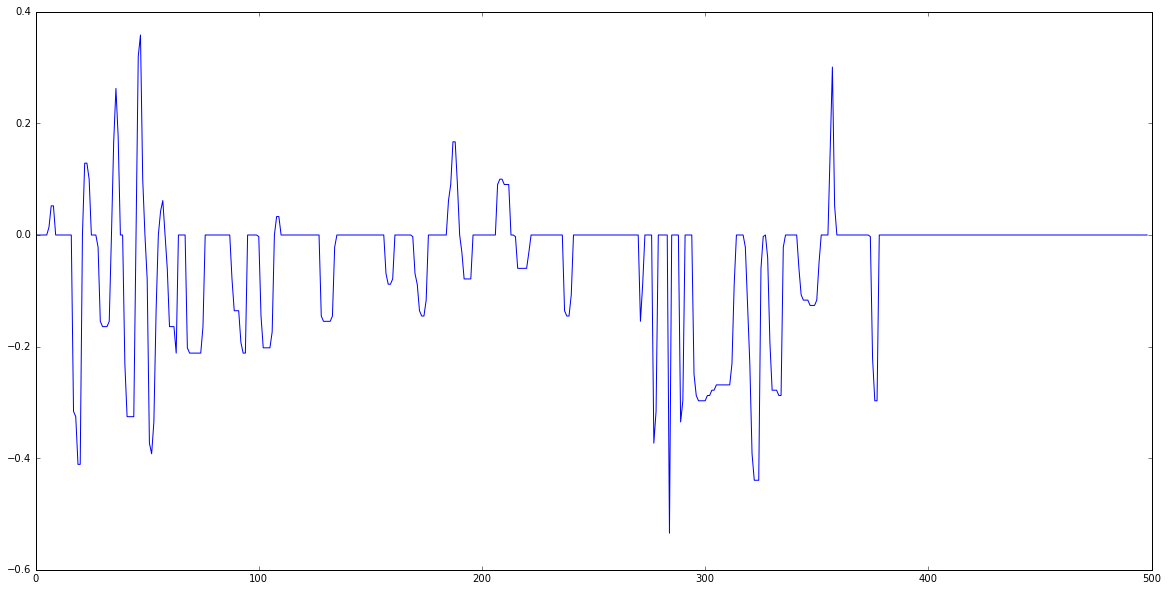

In [6]:
plt.plot(steering[-500:-1]);

In [7]:
# smooth steering angles

/Users/alexeysimonov/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  if __name__ == '__main__':


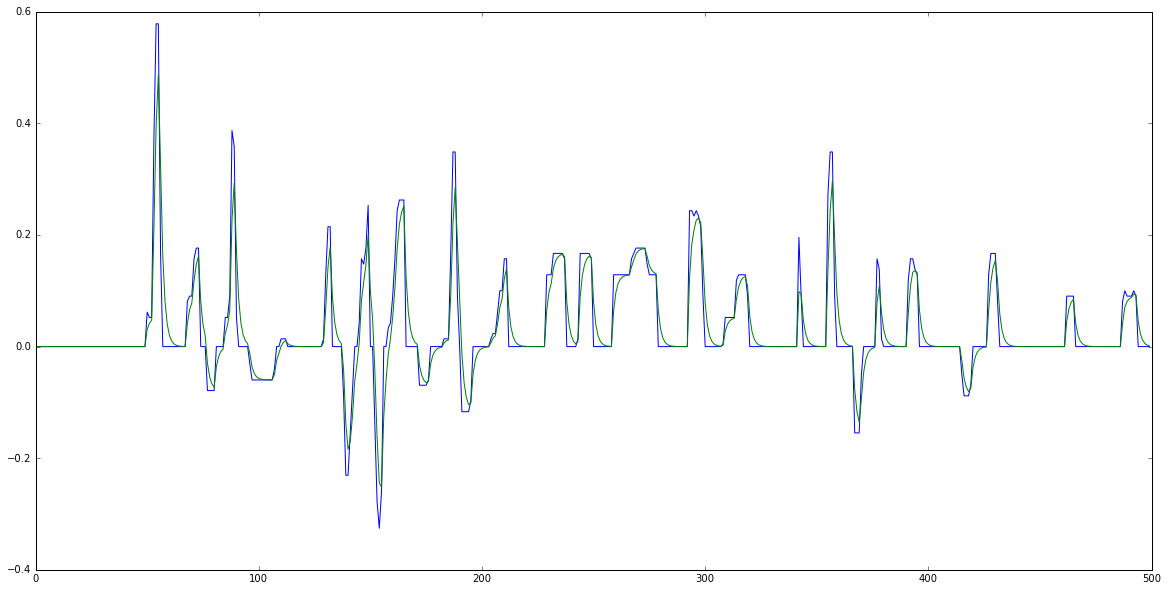

In [8]:
x_ewma = pd.stats.moments.ewma(steering, halflife=0.99)
start = 0
r = range(start,start+500)
plt.plot(r, steering[r], r, x_ewma[r]);

In [9]:
#steering = x_ewma

In [10]:
# load image files

In [11]:
interp = 'cubic'
cimages = np.stack( [sp.imresize(sp.imread(file, mode='RGB'), size=(80,160), interp=interp) for file in cimage_names], axis=0 )

In [12]:
#limages = np.stack( [sp.imresize(sp.imread(file, mode='RGB'), size=(80,160), interp=interp) for file in limage_names], axis=0 )

In [13]:
#rimages = np.stack( [sp.imresize(sp.imread(file, mode='RGB'), size=(80,160), interp=interp) for file in rimage_names], axis=0 )

In [14]:
cimages.shape

(8035, 80, 160, 3)

In [15]:
# resize images

In [16]:
#interp = 'cubic'
#cimages_resized = np.stack( [sp.imresize(image, size=(80,160), interp=interp) for image in cimages], axis=0 )
#cimages_resized.shape

In [17]:
#limages_resized = np.stack( [sp.imresize(image, size=(80,160), interp=interp) for image in limages], axis=0 )

In [18]:
#rimages_resized = np.stack( [sp.imresize(image, size=(80,160), interp=interp) for image in rimages], axis=0 )

In [19]:
def show_images(images, labels_true, rows, cols, cls=None, random=True, labels_predicted=None):
    fig, axes = plt.subplots(rows, cols)
    fig.subplots_adjust(hspace=0.37, wspace=0.3)
    imidx = 0
    for i, ax in enumerate(axes.flat):
        while True:
            if random:
                example = np.random.randint(0, len(images))
            else:
                example = imidx
                imidx += 1
            if cls is None or labels_true[example]==cls:
                break
        if example >= len(images):
            return
        if len(images.shape)==4:
            ax.imshow(images[example,:,:,:]);
        else:
            ax.imshow(images[example,:,:], cmap='Greys_r');
        ax.set_xticks([])
        ax.set_yticks([])
        if labels_predicted is not None:
            str = '{}: true {} pred {}'.format(example, labels_true[example], labels_predicted[example])
        else:
            str = '{}: true {}'.format(example, labels_true[example])
        ax.set_xlabel(str)

In [20]:
#show_images(cimages, steering, 3, 4)

In [21]:
#show_images(cimages[4385:4388], steering[4385:4388], 1, 3, random=False)

In [22]:
#show_images(limages[4385:4388], steering, 1, 3, random=False)

In [23]:
#show_images(rimages[4385:4388], steering, 1, 3, random=False)

In [24]:
#plt.imshow(im[0]);

In [25]:
#perm = np.random.permutation(range(len(center_images)))

In [26]:
#pct_left_right_use = 0.4
#n = int(pct_left_right_use * len(cimages))
#n

In [27]:
#idx=perm[:n]
#idx=range(int(len(cimages)*pct_left_right_use))
#idx=range(len(cimages))

In [28]:
#final image set

In [29]:
#images = np.vstack([cimages, limages[idx], rimages[idx]])
#images = cimages
#images = np.vstack([cimages, cimages[:,:,::-1,:]]) # originals plus flipped version
#images = np.vstack([cimages, cimages[:,:,::-1,:], limages, rimages, limages[:,:,::-1,:], rimages[:,:,::-1,:]]) # originals plus flipped version + left/right
#images.shape

In [30]:
# final steering set

In [31]:
adjustment = 3.0/25. # should be 4 degrees
#image_steering = np.hstack([steering, steering[idx]+adjustment, steering[idx]-adjustment])
#image_steering = steering
#image_steering = np.hstack([steering, -steering, steering+adjustment, steering-adjustment, -(steering+adjustment),-(steering-adjustment)])
#image_steering.shape

In [32]:
# apply a mask

In [33]:
#shape = (None, 160, 320, 3)
#mask = np.zeros(shape[1:])
#mask[0:55,:,:] = 0
#mask[55:130,:,:] = 1
#mask[130:,:,:] = 0
#mask.shape

In [34]:
shape = (None, 80, 160, 3)
mask = np.zeros(shape[1:])
mask[0:27,:,:] = 0
mask[27:65,:,:] = 1
mask[65:,:,:] = 0
mask.shape

(80, 160, 3)

In [35]:
#plt.imshow(np.multiply(cimages[0],mask).astype(np.uint8));

In [36]:
# APPLY MASK
#images = np.multiply(images,mask).astype(np.uint8)
cimages = np.multiply(cimages,mask).astype(np.uint8)
#limages = np.multiply(limages,mask).astype(np.uint8)
#rimages = np.multiply(rimages,mask).astype(np.uint8)

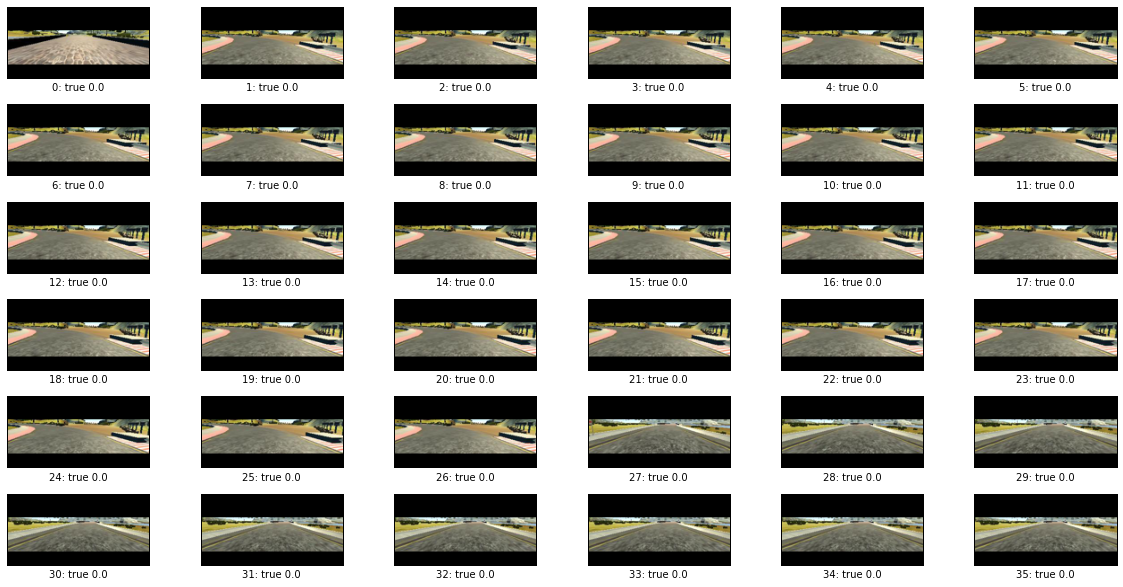

In [37]:
show_images(cimages, steering, 6, 6, random=False)

In [38]:
#show_images(images, image_steering, 3, 4)

In [39]:
import cv2

In [40]:
shape[1:3]

(80, 160)

In [110]:
def trans_image(image, steer, trans_range):
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    steer_ang = steer + tr_x/trans_range*2*.2
    tr_y = 40*np.random.uniform()-40/2
    #tr_y = 0
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image_tr = cv2.warpAffine(image,Trans_M,(shape[2], shape[1]))
    return image_tr,steer_ang

def train_Generator(batch_size=64):
    n = len(cimage_names)
    shape = (batch_size,)+cimages.shape[1:]
    images = np.zeros(shape, dtype=np.uint8)
    image_steering = np.zeros(batch_size)
    while 1:
        perm = np.random.permutation(range(len(cimage_names)))
        current_batch_cnt = 0
        for i in perm: 
#            print ('i = ', i)
            # fliped images from another part of the set
            j = perm[n-1-i]
#            cimage = np.multiply(sp.imread(cimage_names[i], mode='RGB'), mask).astype(np.uint8)
#            limage = np.multiply(sp.imread(limage_names[i], mode='RGB'), mask).astype(np.uint8)
#            rimage = np.multiply(sp.imread(limage_names[i], mode='RGB'), mask).astype(np.uint8)
            images[current_batch_cnt,:,:,:] = cimages[i]
            image_steering[current_batch_cnt] = steering[i]
            current_batch_cnt += 1
            images[current_batch_cnt,:,:,:] = cimages[j][:,::-1,:]
            image_steering[current_batch_cnt] = -steering[j]
            current_batch_cnt += 1
            # shifted image for recovery
            trrange = 20
            im, st = trans_image(cimages[i], steer=steering[i], trans_range=trrange)
            images[current_batch_cnt,:,:,:] = im
            image_steering[current_batch_cnt] = st
            current_batch_cnt += 1
            #im, st = trans_image(cimages[j][:,::-1,:], steer=-steering[j], trans_range=10)
            #images[current_batch_cnt,:,:,:] = im
            #image_steering[current_batch_cnt] = st
            #current_batch_cnt += 1

            #images[current_batch_cnt,:,:,:] = limages[i]
            #image_steering[current_batch_cnt] = steering[i]+adjustment
            #current_batch_cnt += 1
            #images[current_batch_cnt,:,:,:] = rimages[i]
            #image_steering[current_batch_cnt] = steering[i]-adjustment
            #current_batch_cnt += 1
            #images[current_batch_cnt,:,:,:] = limages[j][:,::-1,:]
            #image_steering[current_batch_cnt] = -(steering[j]+adjustment)
            #current_batch_cnt += 1
            #images[current_batch_cnt,:,:,:] = rimages[j][:,::-1,:]
            #image_steering[current_batch_cnt] = -(steering[j]-adjustment)
            #current_batch_cnt += 1
            if current_batch_cnt == batch_size or current_batch_cnt+3>batch_size:
                yield images, image_steering
                current_batch_cnt = 0

(0.0, -0.076948024879831683)

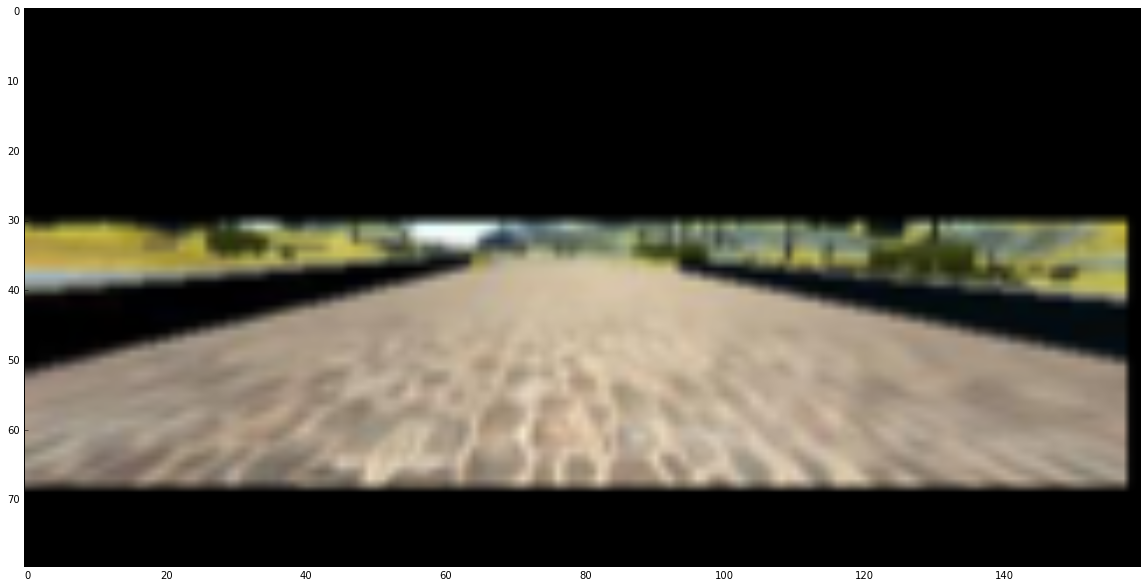

In [84]:
idx = 0
im, st = trans_image(cimages[idx], steer=steering[idx], trans_range=10)
plt.imshow(im)
steering[idx], st

In [85]:
images, image_steering = train_Generator(36).__next__()

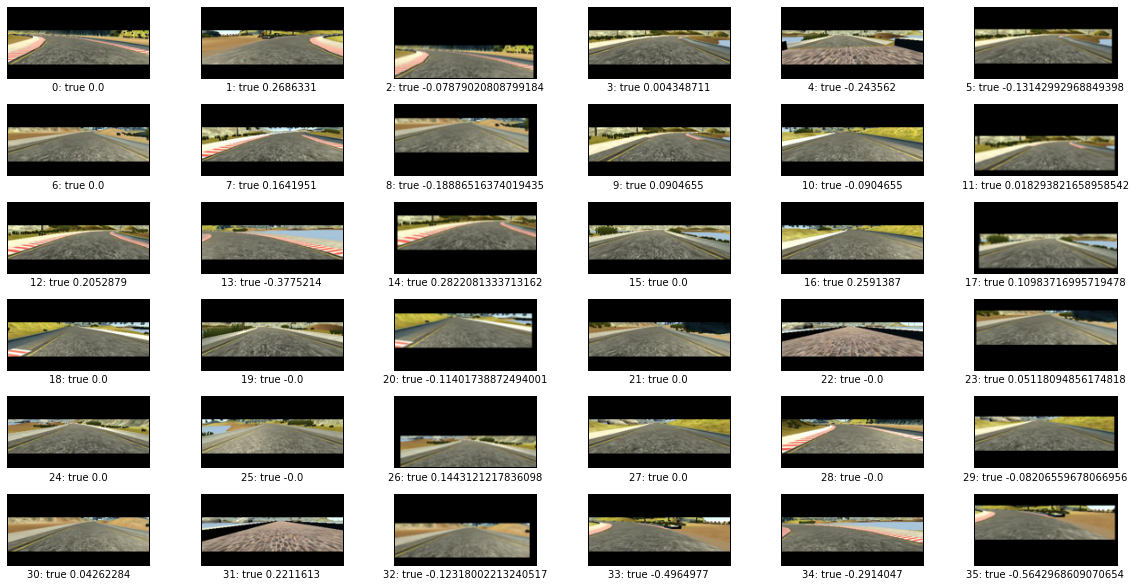

In [86]:
show_images(images, image_steering, 6, 6, random=False)

In [87]:
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

from keras.models import Sequential, model_from_json
from keras.layers import Input, Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, ELU, Lambda
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

def get_session(gpu_fraction=0.6):
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)
    return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
KTF.set_session(get_session())

In [88]:
model = Sequential()
# normalize
model.add(Lambda(lambda x: x/127.5 - 1., input_shape=images.shape[1:], output_shape=images.shape[1:]))
# 
model.add(Conv2D(24, 5, 5, subsample=(2,2), border_mode='valid'))
model.add(Activation('relu'))
model.add(Conv2D(36, 5, 5, subsample=(2,2), border_mode='valid'))
#model.add(MaxPooling2D((2,2)))
#model.add((Dropout(0.5)))
model.add(Activation('relu'))
#
model.add(Conv2D(48, 5, 5, subsample=(2,2), border_mode='valid'))
#model.add(MaxPooling2D((2,2)))
#model.add((Dropout(0.5)))
model.add(Activation('relu'))
# 
model.add(Conv2D(64, 3, 3, border_mode='valid'))
#model.add(MaxPooling2D((2,2)))
#model.add((Dropout(0.5)))
model.add(Activation('relu'))
# 
model.add(Conv2D(64, 3, 3, border_mode='valid'))
#model.add(MaxPooling2D((2,2)))
model.add((Dropout(0.1)))
model.add(Activation('relu'))
#
model.add(Flatten()) 
model.add(Dense(300, activation='relu'))
model.add(Dense(10))
# output
model.add(Dense(1))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_3 (Lambda)                (None, 80, 160, 3)    0           lambda_input_3[0][0]             
____________________________________________________________________________________________________
convolution2d_11 (Convolution2D) (None, 38, 78, 24)    1824        lambda_3[0][0]                   
____________________________________________________________________________________________________
activation_11 (Activation)       (None, 38, 78, 24)    0           convolution2d_11[0][0]           
____________________________________________________________________________________________________
convolution2d_12 (Convolution2D) (None, 17, 37, 36)    21636       activation_11[0][0]              
___________________________________________________________________________________________

In [111]:
learning_rate= 0.0001 #0.00001
batch_size = 64
epochs = 5
optimizer = Adam(lr=learning_rate)

In [112]:
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])
json_str = model.to_json()
with open('model.json','w') as f:
    json.dump(json_str, f)

In [93]:
#datagen = ImageDataGenerator()
#train_generator = datagen.flow(X = images[idx], y = image_steering[idx], batch_size = batch_size) 

In [94]:
#train_datagen = ImageDataGenerator(
#        width_shift_range=0.1,
#        height_shift_range=0.02,
#        fill_mode='nearest') 
#train_generator = train_datagen.flow(X_train, Y_train, batch_size=128)  

In [114]:
history = model.fit_generator(train_Generator(batch_size), 
                              samples_per_epoch=len(cimage_names)*3, 
                              nb_epoch=epochs,
                              verbose=1)
model.save_weights('model.h5')

Epoch 1/5
24128/24105 [==============================] - 62s - loss: 0.0105 - mean_squared_error: 0.0105    
Epoch 2/5
   64/24105 [..............................] - ETA: 61s - loss: 0.0078 - mean_squared_error: 0.0078

/Users/alexeysimonov/anaconda/lib/python3.5/site-packages/keras/engine/training.py:1470: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


24128/24105 [==============================] - 61s - loss: 0.0109 - mean_squared_error: 0.0109    
Epoch 3/5
24128/24105 [==============================] - 61s - loss: 0.0111 - mean_squared_error: 0.0111    
Epoch 4/5
24128/24105 [==============================] - 61s - loss: 0.0108 - mean_squared_error: 0.0108    
Epoch 5/5
24128/24105 [==============================] - 61s - loss: 0.0108 - mean_squared_error: 0.0108    


In [52]:
model.save_weights('model.h5')

In [104]:
import math
def test_Generator(batch_size=64):
    n = 125*64#len(cimage_names)
    shape = (batch_size,)+cimages.shape[1:]
    batches = math.ceil(n/batch_size)
    while 1:
        for i in range(batches-1): 
            # should be returning masked images
            idx = range((i*batch_size), ((i+1)*batch_size))
            yield cimages[idx], steering[idx]

In [105]:
#test_generator = ImageDataGenerator().flow(X = cimages, shuffle=False, batch_size=64) 

In [106]:
predicted_angle = model.predict_generator(test_Generator(64), val_samples=124*64)

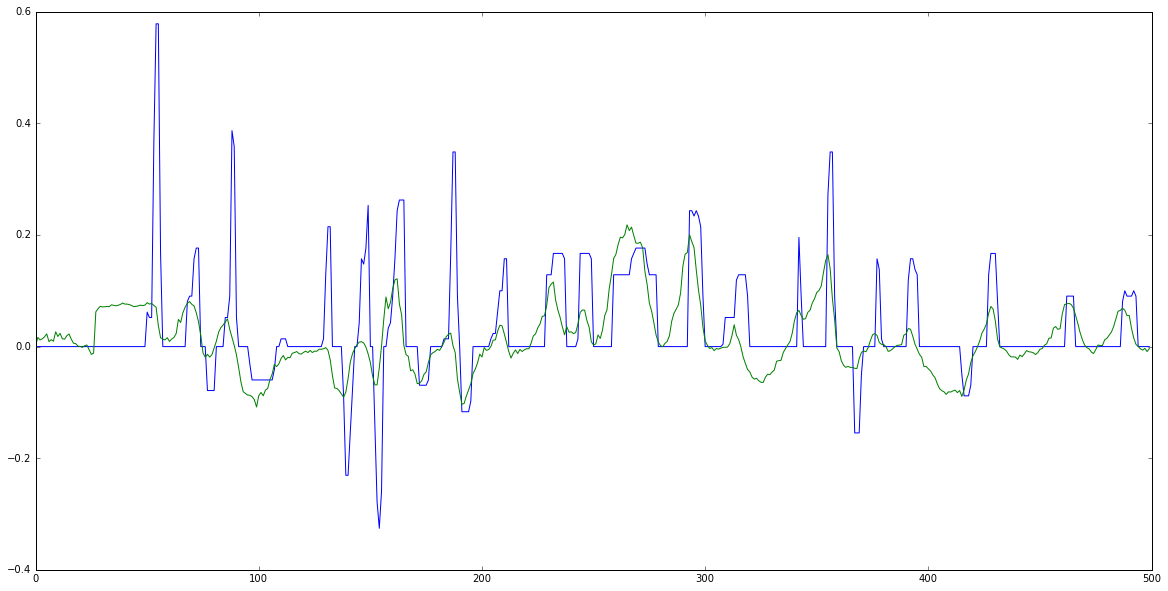

In [107]:
r = range(0,500)
plt.plot(r, steering[r], r, predicted_angle[r]);

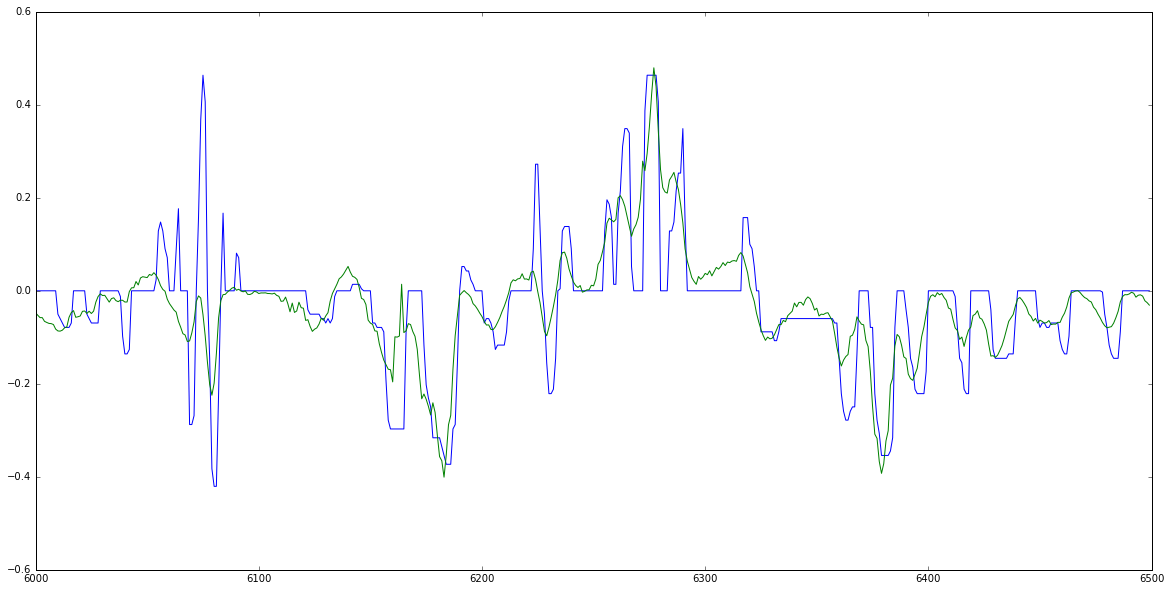

In [108]:
start = 6000
r = range(start,start+500)
plt.plot(r, steering[r], r, predicted_angle[r]);

In [58]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
STOP
#model.load_weights('model.h5', by_name=False)

In [ ]:
model.save_weights('model.h5')
history = model.fit_generator(train_generator, 
                                samples_per_epoch=len(images), 
                                nb_epoch=20,
                                verbose=1)

In [ ]:
model.save_weights('model.h5')

In [ ]:
STOP

In [ ]:
with open('model.json','r') as f:
    json_str = json.load(f)
model = model_from_json(json_str)

In [ ]:
model.summary()

In [113]:
model.load_weights('model.h5', by_name=False)